In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from tslearn.clustering import TimeSeriesKMeans

In [2]:
london = pd.read_csv("../Data/Londondata/london_formatted_narrow.csv")

In [3]:
london.drop("Unnamed: 0",axis = 1, inplace = True)

In [4]:
london["hour"] = london["hour"].astype(str).str.zfill(2)

In [5]:
london["day_of_the_week"] = london["day_of_the_week"].where(
    (london["day_of_the_week"] != 'Monday'), '0').where(
    (london["day_of_the_week"] != 'Tuesday'), '1').where(
    (london["day_of_the_week"] != 'Wednesday'), '2').where(
    (london["day_of_the_week"] != 'Thursday'), '3').where(
    (london["day_of_the_week"] != 'Friday'), '4').where(
    (london["day_of_the_week"] != 'Saturday'), '5').where(
    (london["day_of_the_week"] != 'Sunday'), '6')

In [6]:
london['timestamp'] = london["season"] + ' ' + london['day_of_the_week'] + ' ' + london['hour'] + 'h'

In [7]:
london.head()

,profile_ID,season,day_of_the_week,hour,consumption_kWh,timestamp
0,MAC000036,Winter,4,00,0.027833,Winter 4 00h
1,MAC000036,Winter,4,01,0.032500,Winter 4 01h
2,MAC000036,Winter,4,02,0.030583,Winter 4 02h
3,MAC000036,Winter,4,03,0.023250,Winter 4 03h
4,MAC000036,Winter,4,04,0.033000,Winter 4 04h


Pivot it 

In [8]:
london_cluster = london.pivot(index='profile_ID', columns='timestamp', values='consumption_kWh')

In [9]:
london_cluster.drop(['MAC000037', 'MAC000197'], inplace = True)

In [10]:
london_cluster.head()

timestamp,Autumn 0 00h,Autumn 0 01h,Autumn 0 02h,Autumn 0 03h,Autumn 0 04h,Autumn 0 05h,Autumn 0 06h,Autumn 0 07h,Autumn 0 08h,Autumn 0 09h,...,Winter 6 14h,Winter 6 15h,Winter 6 16h,Winter 6 17h,Winter 6 18h,Winter 6 19h,Winter 6 20h,Winter 6 21h,Winter 6 22h,Winter 6 23h
profile_ID,,,,,,,,,,,,,,,,,,,,,
MAC000036,0.042077,0.040769,0.040462,0.037692,0.039231,0.038000,0.067615,0.231769,0.195846,0.088462,...,0.148769,0.139385,0.166615,0.162923,0.170692,0.209846,0.180462,0.125846,0.073769,0.057462
MAC000038,0.248538,0.231538,0.211000,0.273462,0.327923,0.564615,0.724385,0.745769,0.477462,0.433923,...,0.870923,0.837308,0.698308,1.193154,1.197462,0.992231,0.991000,1.057538,0.895308,0.533000
MAC000039,0.170308,0.152462,0.152846,0.155077,0.149077,0.345308,0.354923,0.404077,0.428462,0.423077,...,0.821077,0.790154,0.972923,0.678231,0.762000,1.467308,1.428615,0.883538,0.746615,0.414923
MAC000040,0.998769,0.754538,1.082846,0.900846,0.677462,0.786538,1.278615,1.520000,1.813077,1.839462,...,1.491462,1.752077,1.450385,1.051769,1.091538,1.528154,1.430077,1.449538,1.474077,1.423462
MAC000041,0.311615,0.176462,0.173692,0.176692,0.187154,0.247769,0.330462,0.456000,0.417538,0.337000,...,0.307154,0.315923,0.428769,0.440846,0.646769,0.843077,0.755615,0.892308,0.843692,0.590923


### Normalising the data 

We are going to divide all value in a row by the maximun of this row. This way all data will be between 0 and 1

In [12]:
london_norm = london_cluster.divide(london_cluster.max(axis = 1), axis=0)

In [12]:
london_norm.head()

timestamp,Autumn 0 00h,Autumn 0 01h,Autumn 0 02h,Autumn 0 03h,Autumn 0 04h,Autumn 0 05h,Autumn 0 06h,Autumn 0 07h,Autumn 0 08h,Autumn 0 09h,...,Winter 6 14h,Winter 6 15h,Winter 6 16h,Winter 6 17h,Winter 6 18h,Winter 6 19h,Winter 6 20h,Winter 6 21h,Winter 6 22h,Winter 6 23h
profile_ID,,,,,,,,,,,,,,,,,,,,,
MAC000036,0.112366,0.108874,0.108053,0.100657,0.104766,0.101479,0.180567,0.618940,0.523007,0.236237,...,0.397288,0.372227,0.444947,0.435086,0.455834,0.560394,0.481923,0.336072,0.197001,0.153451
MAC000038,0.095728,0.089180,0.081269,0.105327,0.126304,0.217469,0.279006,0.287242,0.183900,0.167131,...,0.335447,0.322499,0.268962,0.459558,0.461217,0.382170,0.381696,0.407324,0.344839,0.205292
MAC000039,0.116068,0.103906,0.104168,0.105688,0.101599,0.235334,0.241887,0.275387,0.292005,0.288336,...,0.559581,0.538506,0.663067,0.462228,0.519318,1.000000,0.973630,0.602149,0.508834,0.282779
MAC000040,0.362935,0.274186,0.393487,0.327352,0.246177,0.285814,0.464626,0.552341,0.658840,0.668428,...,0.541971,0.636674,0.527044,0.382194,0.396646,0.555304,0.519665,0.526737,0.535653,0.517261
MAC000041,0.267645,0.151562,0.149184,0.151760,0.160746,0.212808,0.283832,0.391656,0.358622,0.289448,...,0.263813,0.271345,0.368268,0.378641,0.555507,0.724115,0.648995,0.766399,0.724644,0.507541


(X-min)/(max-min)

In [17]:
l = london_cluster.sub(london_cluster.min(axis = 1), axis = 0)
l.head()

timestamp,Autumn 0 00h,Autumn 0 01h,Autumn 0 02h,Autumn 0 03h,Autumn 0 04h,Autumn 0 05h,Autumn 0 06h,Autumn 0 07h,Autumn 0 08h,Autumn 0 09h,...,Winter 6 14h,Winter 6 15h,Winter 6 16h,Winter 6 17h,Winter 6 18h,Winter 6 19h,Winter 6 20h,Winter 6 21h,Winter 6 22h,Winter 6 23h
profile_ID,,,,,,,,,,,,,,,,,,,,,
MAC000036,0.026827,0.025519,0.025212,0.022442,0.023981,0.022750,0.052365,0.216519,0.180596,0.073212,...,0.133519,0.124135,0.151365,0.147673,0.155442,0.194596,0.165212,0.110596,0.058519,0.042212
MAC000038,0.136372,0.119372,0.098833,0.161295,0.215756,0.452449,0.612218,0.633603,0.365295,0.321756,...,0.758756,0.725141,0.586141,1.080987,1.085295,0.880064,0.878833,0.945372,0.783141,0.420833
MAC000039,0.043593,0.025747,0.026132,0.028363,0.022363,0.218593,0.228209,0.277363,0.301747,0.296363,...,0.694363,0.663440,0.846209,0.551516,0.635286,1.340593,1.301901,0.756824,0.619901,0.288209
MAC000040,0.397923,0.153692,0.482000,0.300000,0.076615,0.185692,0.677769,0.919154,1.212231,1.238615,...,0.890615,1.151231,0.849538,0.450923,0.490692,0.927308,0.829231,0.848692,0.873231,0.822615
MAC000041,0.232538,0.097385,0.094615,0.097615,0.108077,0.168692,0.251385,0.376923,0.338462,0.257923,...,0.228077,0.236846,0.349692,0.361769,0.567692,0.764000,0.676538,0.813231,0.764615,0.511846


In [19]:
london_norm = london_cluster.sub(london_cluster.min(axis = 1), axis = 0).divide(london_cluster.max(axis = 1) - london_cluster.min(axis = 1), axis=0)

## Standardized data analysis


### Analysis on the seasons

Standardizing the data

In [194]:
london_stand = london_cluster.sub(london_cluster.mean(axis = 1), axis = 0).divide(london_cluster.std(axis = 1), axis = 0)

Performing the clustering 

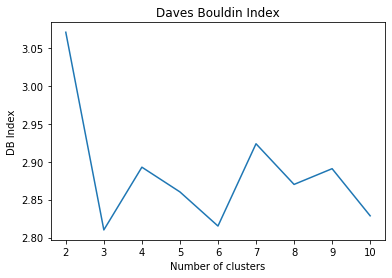

In [195]:
db = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(london_stand)
    clusters = kmeans.labels_
    db.append(davies_bouldin_score(london_stand, clusters))
plt.plot(range(2, 11), db)
plt.title('Daves Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('DB Index')
plt.show()

In [196]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(london_stand)

In [197]:
centroids = kmeans.cluster_centers_ 

In [198]:
labels = list(kmeans.labels_)


In [199]:
cluster_distrib = [labels.count(0),labels.count(1),labels.count(2)
     ,labels.count(3),labels.count(4),labels.count(5)]
cluster_distrib

[78, 40, 46, 19, 119, 101]

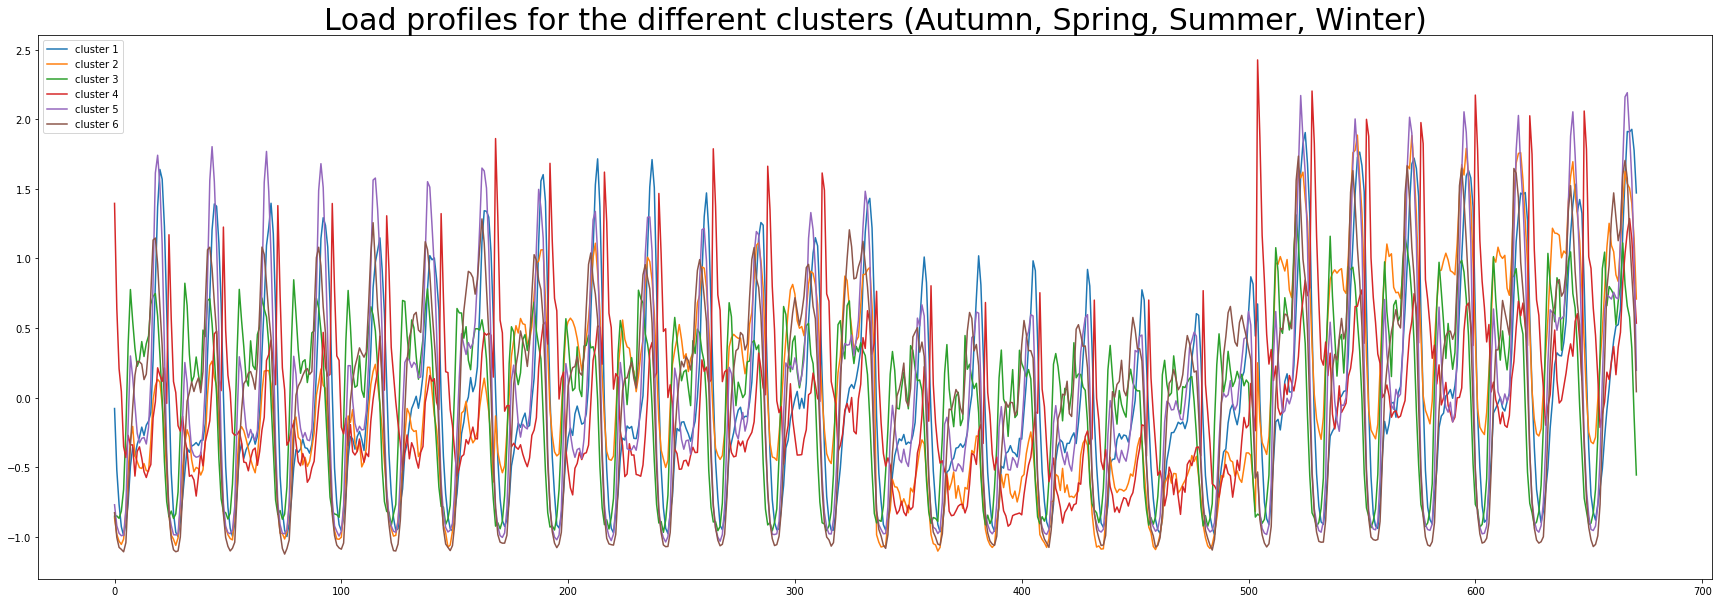

In [200]:
figure(figsize=(30,10))


plt.plot(centroids[0], label = "cluster 1") 
plt.plot(centroids[1], label = "cluster 2") 
plt.plot(centroids[2], label = "cluster 3")
plt.plot(centroids[3], label = "cluster 4")
plt.plot(centroids[4], label = "cluster 5")
plt.plot(centroids[5], label = "cluster 6")

plt.title("Load profiles for the different clusters (Autumn, Spring, Summer, Winter)", size = 30)

plt.legend() 
plt.savefig('loads.png')
plt.show()

### Analysis on a mean day for the year

In [201]:
london_mean_day = london.groupby(["profile_ID",
    "hour"])['consumption_kWh'].apply(lambda x: np.mean(x))
london_mean_day = london_mean_day.to_frame()
london_mean_day.reset_index(inplace = True)
london_mean_day.head()


,profile_ID,hour,consumption_kWh
0,MAC000036,00,0.040155
1,MAC000036,01,0.039533
2,MAC000036,02,0.036183
3,MAC000036,03,0.039734
4,MAC000036,04,0.035035


In [202]:
london_mean_days = london_mean_day.pivot(index='profile_ID',
                    columns='hour', values='consumption_kWh')
london_mean_days.drop(['MAC000037', 'MAC000197'], inplace = True)

In [203]:
london_stand_mean_day = london_mean_days.sub(london_mean_days.mean(
    axis = 1), axis = 0).divide(london_mean_days.std(axis = 1), axis = 0)

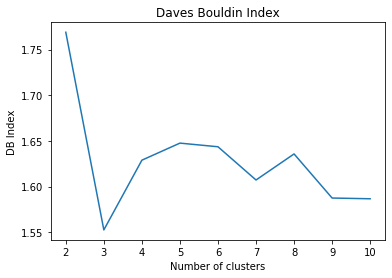

In [204]:
db = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(london_stand_mean_day)
    clusters = kmeans.labels_
    db.append(davies_bouldin_score(london_stand_mean_day, clusters))
plt.plot(range(2, 11), db)
plt.title('Daves Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('DB Index')
plt.show()

In [205]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(london_stand_mean_day)

In [206]:
centroids = kmeans.cluster_centers_ 

In [207]:
labels = list(kmeans.labels_)


In [208]:
cluster_distrib = [labels.count(0),labels.count(1),labels.count(2)
     ,labels.count(3),labels.count(4),labels.count(5)]
cluster_distrib

[201, 24, 178, 0, 0, 0]

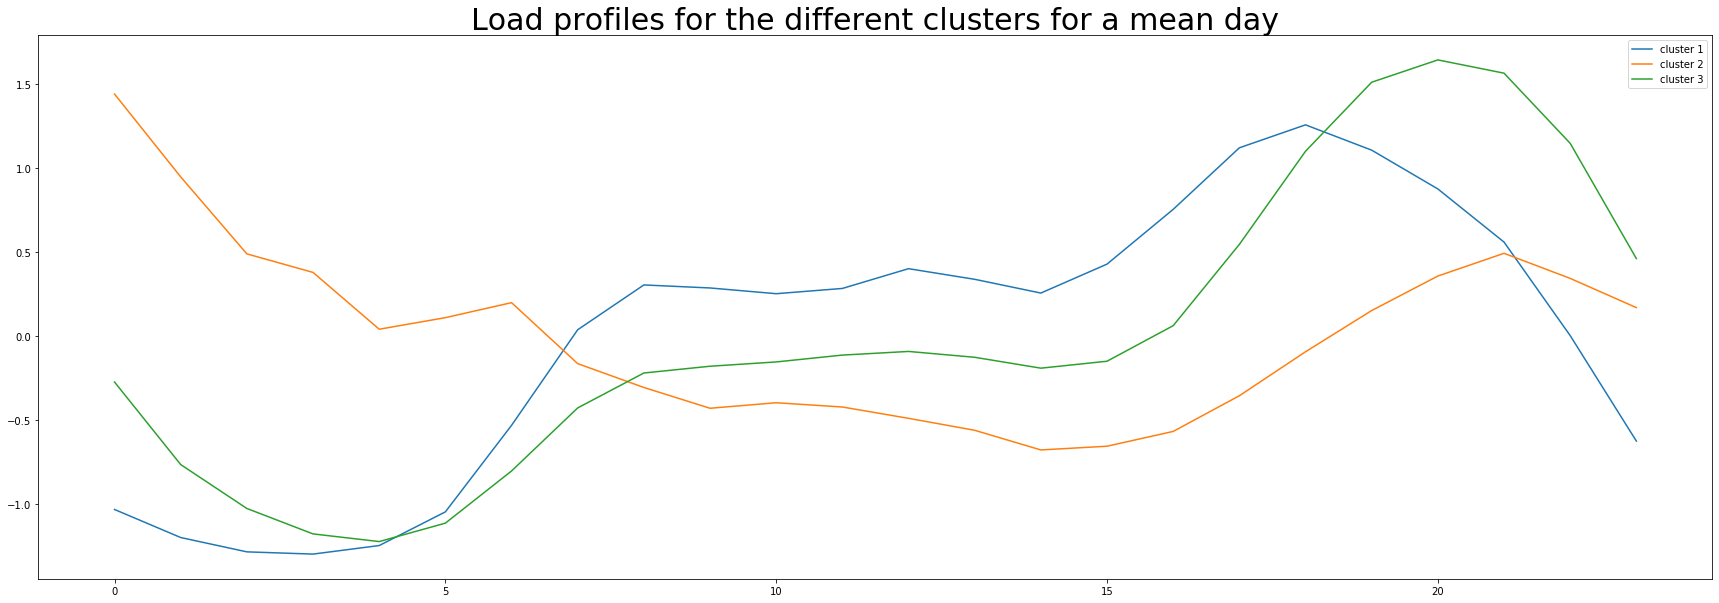

In [209]:
figure(figsize=(30,10))


plt.plot(centroids[0], label = "cluster 1") 
plt.plot(centroids[1], label = "cluster 2") 
plt.plot(centroids[2], label = "cluster 3")

plt.title("Load profiles for the different clusters for a mean day", size = 30)

plt.legend() 
plt.savefig('loads_mean_day.png')
plt.show()

### Two seasons

In [210]:
london_two_seasons = london.copy()
print(london["season"].unique())
london_two_seasons["season"] = london_two_seasons["season"].where(
    (london_two_seasons["season"] != 'Winter'), '0').where(
    (london_two_seasons["season"] != 'Autumn'), '0').where(
    (london_two_seasons["season"] != 'Spring'), '1').where(
    (london_two_seasons["season"] != 'Summer'), '1')
print(london_two_seasons["season"].unique())

london_two_seasons = london_two_seasons.groupby(["profile_ID","season", "day_of_the_week",
    "hour"])['consumption_kWh'].apply(lambda x: np.mean(x))
london_two_seasons = london_two_seasons.to_frame()
london_two_seasons.reset_index(inplace = True)



['Winter' 'Summer' 'Spring' 'Autumn']
['0' '1']


In [211]:
london_two_seasons["timestamp"] = london_two_seasons[
    "season"] +' '+ london_two_seasons[
    "day_of_the_week"] + ' ' + london_two_seasons["hour"]

london_two_seasons.head()

,profile_ID,season,day_of_the_week,hour,consumption_kWh,timestamp
0,MAC000036,0,0,00,0.031654,0 0 00
1,MAC000036,0,0,01,0.043231,0 0 01
2,MAC000036,0,0,02,0.030538,0 0 02
3,MAC000036,0,0,03,0.036269,0 0 03
4,MAC000036,0,0,04,0.032423,0 0 04


In [212]:
london_two_seasons = london_two_seasons.pivot(index='profile_ID',
                    columns='timestamp', values='consumption_kWh')
london_two_seasons.drop(['MAC000037', 'MAC000197'], inplace = True)

In [213]:
london_stand_two_seasons = london_two_seasons.sub(
    london_two_seasons.mean(axis = 1), axis = 0).divide(
    london_two_seasons.std(axis = 1), axis = 0)

In [214]:
london_stand_two_seasons.head()

timestamp,0 0 00,0 0 01,0 0 02,0 0 03,0 0 04,0 0 05,0 0 06,0 0 07,0 0 08,0 0 09,...,1 6 14,1 6 15,1 6 16,1 6 17,1 6 18,1 6 19,1 6 20,1 6 21,1 6 22,1 6 23
profile_ID,,,,,,,,,,,,,,,,,,,,,
MAC000036,-1.185999,-1.011099,-1.202850,-1.116271,-1.174378,-1.142419,-0.923939,0.244004,2.531660,-0.061056,...,0.352082,1.292246,0.524077,0.266665,0.603102,2.092374,0.674573,-0.227822,-0.721147,-0.990180
MAC000038,-0.828182,-0.990039,-1.040988,-0.900786,-0.757455,-0.317824,0.129443,0.523634,-0.010132,-0.233077,...,0.551799,-0.260367,0.047575,0.076492,0.330231,0.271021,0.586349,0.946742,0.134951,-0.759208
MAC000039,-0.793703,-0.962257,-0.965166,-0.955146,-0.985690,-0.562286,0.408958,0.022723,-0.128862,0.105141,...,1.077516,0.663485,0.429320,1.266916,3.653492,3.303133,1.937413,0.850784,0.215355,-0.640017
MAC000040,-1.174185,-1.397129,-0.751538,-1.739354,-2.016651,-0.941896,-1.098928,0.143804,0.983195,1.354441,...,-0.388286,-0.490720,-0.245149,1.007789,-0.022574,-0.226458,1.327264,1.481960,0.691265,-0.569297
MAC000041,-0.279444,-0.967579,-1.003015,-1.003586,-0.968341,-0.547306,-0.351077,0.333247,0.667789,0.170739,...,-0.659328,-0.522159,-0.414137,-0.285541,0.126921,0.861732,0.810674,0.565864,0.159499,-0.722198


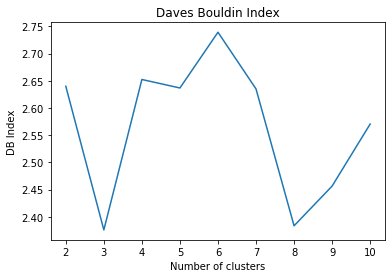

In [215]:
db = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(london_stand_two_seasons)
    clusters = kmeans.labels_
    db.append(davies_bouldin_score(london_stand_two_seasons, clusters))
plt.plot(range(2, 11), db)
plt.title('Daves Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('DB Index')
plt.show()

In [216]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(london_stand_two_seasons)

In [217]:
centroids = kmeans.cluster_centers_ 

In [218]:
labels = list(kmeans.labels_)


In [219]:
cluster_distrib = [labels.count(0),labels.count(1),labels.count(2)
     ,labels.count(3),labels.count(4),labels.count(5)]
cluster_distrib

[183, 29, 191, 0, 0, 0]

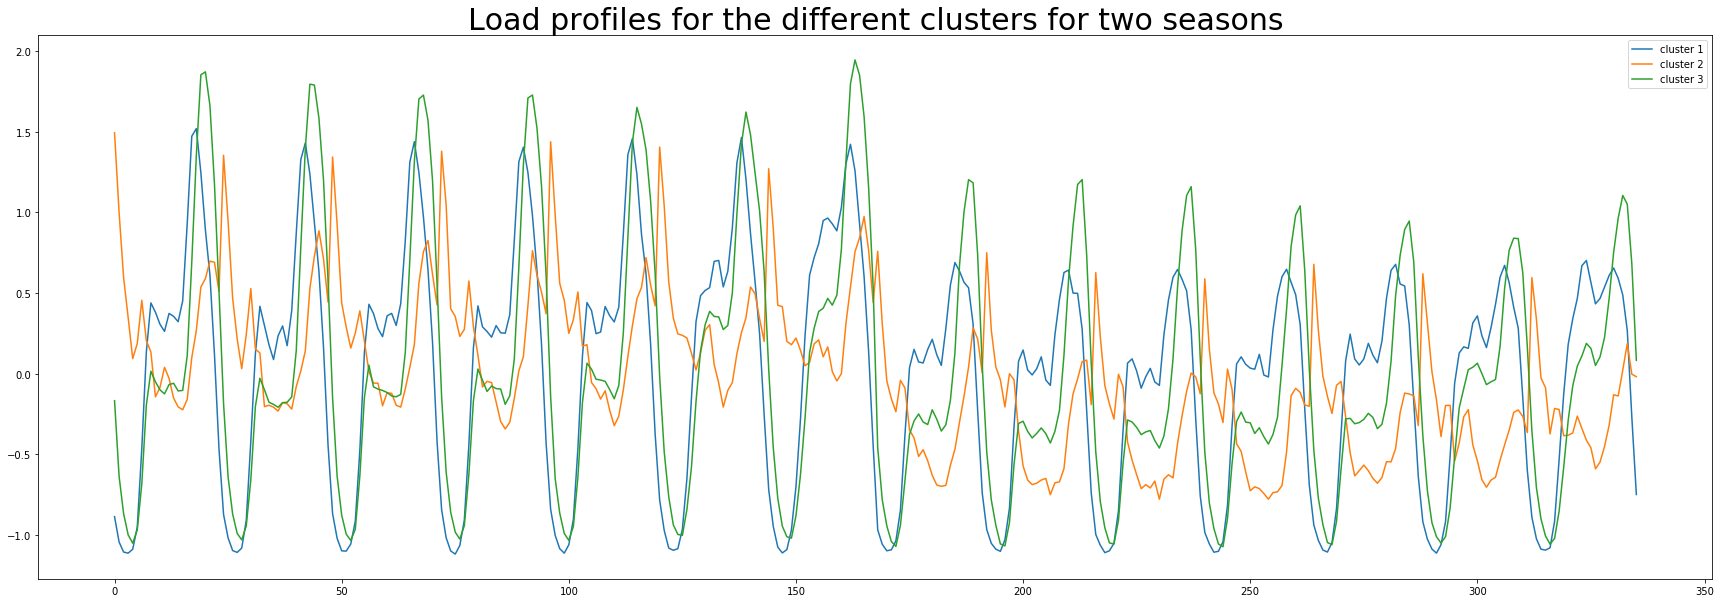

In [220]:
figure(figsize=(30,10))


plt.plot(centroids[0], label = "cluster 1") 
plt.plot(centroids[1], label = "cluster 2") 
plt.plot(centroids[2], label = "cluster 3")


plt.title("Load profiles for the different clusters for two seasons", size = 30)

plt.legend() 
plt.savefig('loads_two_seasons.png')
plt.show()

### Mean Weekday + Weekend

In [221]:
london_weekend_weekday = london.copy()
london_weekend_weekday["day_of_the_week"] = london_weekend_weekday["day_of_the_week"].where(
    (london_weekend_weekday["day_of_the_week"] != '0'), '0').where(
    (london_weekend_weekday["day_of_the_week"] != '1'), '0').where(
    (london_weekend_weekday["day_of_the_week"] != '2'), '0').where(
    (london_weekend_weekday["day_of_the_week"] != '3'), '0').where(
    (london_weekend_weekday["day_of_the_week"] != '4'), '0').where(
    (london_weekend_weekday["day_of_the_week"] != '5'), '1').where(
    (london_weekend_weekday["day_of_the_week"] != '6'), '1')

print(london_weekend_weekday["day_of_the_week"].unique())

london_weekend_weekday = london_weekend_weekday.groupby(["profile_ID","day_of_the_week",
    "hour"])['consumption_kWh'].apply(lambda x: np.mean(x))
london_weekend_weekday = london_weekend_weekday.to_frame()
london_weekend_weekday.reset_index(inplace = True)



['0' '1']


In [222]:
london_weekend_weekday["timestamp"] = london_weekend_weekday[
    "day_of_the_week"] + ' ' + london_weekend_weekday["hour"]
london_weekend_weekday.head()

,profile_ID,day_of_the_week,hour,consumption_kWh,timestamp
0,MAC000036,0,00,0.040183,0 00
1,MAC000036,0,01,0.039731,0 01
2,MAC000036,0,02,0.036473,0 02
3,MAC000036,0,03,0.039435,0 03
4,MAC000036,0,04,0.034898,0 04


In [223]:
london_weekend_weekday = london_weekend_weekday.pivot(index='profile_ID',
                    columns='timestamp', values='consumption_kWh')
london_weekend_weekday.drop(['MAC000037', 'MAC000197'], inplace = True)

In [224]:
london_stand_weekend = london_weekend_weekday.sub(
    london_weekend_weekday.mean(axis = 1), axis = 0).divide(
    london_weekend_weekday.std(axis = 1), axis = 0)

In [225]:
london_stand_weekend.head()

timestamp,0 00,0 01,0 02,0 03,0 04,0 05,0 06,0 07,0 08,0 09,...,1 14,1 15,1 16,1 17,1 18,1 19,1 20,1 21,1 22,1 23
profile_ID,,,,,,,,,,,,,,,,,,,,,
MAC000036,-1.146178,-1.153400,-1.205470,-1.158131,-1.230654,-1.158928,-1.195362,1.522603,1.688983,0.022242,...,0.567432,1.319959,1.018521,0.496421,0.733793,1.706320,0.945673,-0.032975,-0.720140,-1.046911
MAC000038,-1.111765,-1.272918,-1.369049,-1.275283,-0.990637,-0.689167,-0.345002,0.058666,-0.265132,-0.463677,...,0.319510,-0.092575,-0.205892,0.292326,0.539944,0.588284,1.040327,1.326611,0.567623,-0.326805
MAC000039,-1.059707,-1.220620,-1.237436,-1.232604,-1.251856,-0.434510,-0.077056,-0.390505,0.249845,0.980026,...,1.015847,0.631856,0.592004,0.853507,1.847105,2.340068,1.579052,0.746247,0.411446,-0.444177
MAC000040,-1.463483,-1.618227,-1.488157,-1.591284,-1.564739,-1.621694,-0.579006,0.808454,0.859305,0.513317,...,-0.098785,-0.199148,0.055043,0.656058,0.504666,0.467427,1.253963,1.909226,1.155920,-0.115451
MAC000041,-0.811178,-1.104371,-1.292874,-1.302643,-1.268316,-0.947484,-0.617072,-0.091717,0.426067,0.157502,...,0.059239,-0.117014,0.126982,0.558924,0.959621,1.723573,1.973569,1.550647,1.150108,0.212604


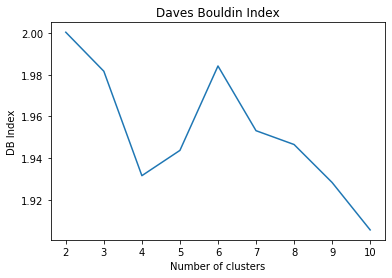

In [226]:
db = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(london_stand_weekend)
    clusters = kmeans.labels_
    db.append(davies_bouldin_score(london_stand_weekend, clusters))
plt.plot(range(2, 11), db)
plt.title('Daves Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('DB Index')
plt.show()

In [228]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(london_stand_weekend)

In [229]:
centroids = kmeans.cluster_centers_ 

In [230]:
labels = list(kmeans.labels_)


In [231]:
cluster_distrib = [labels.count(0),labels.count(1),labels.count(2)
     ,labels.count(3),labels.count(4),labels.count(5)]
cluster_distrib

[154, 161, 69, 19, 0, 0]

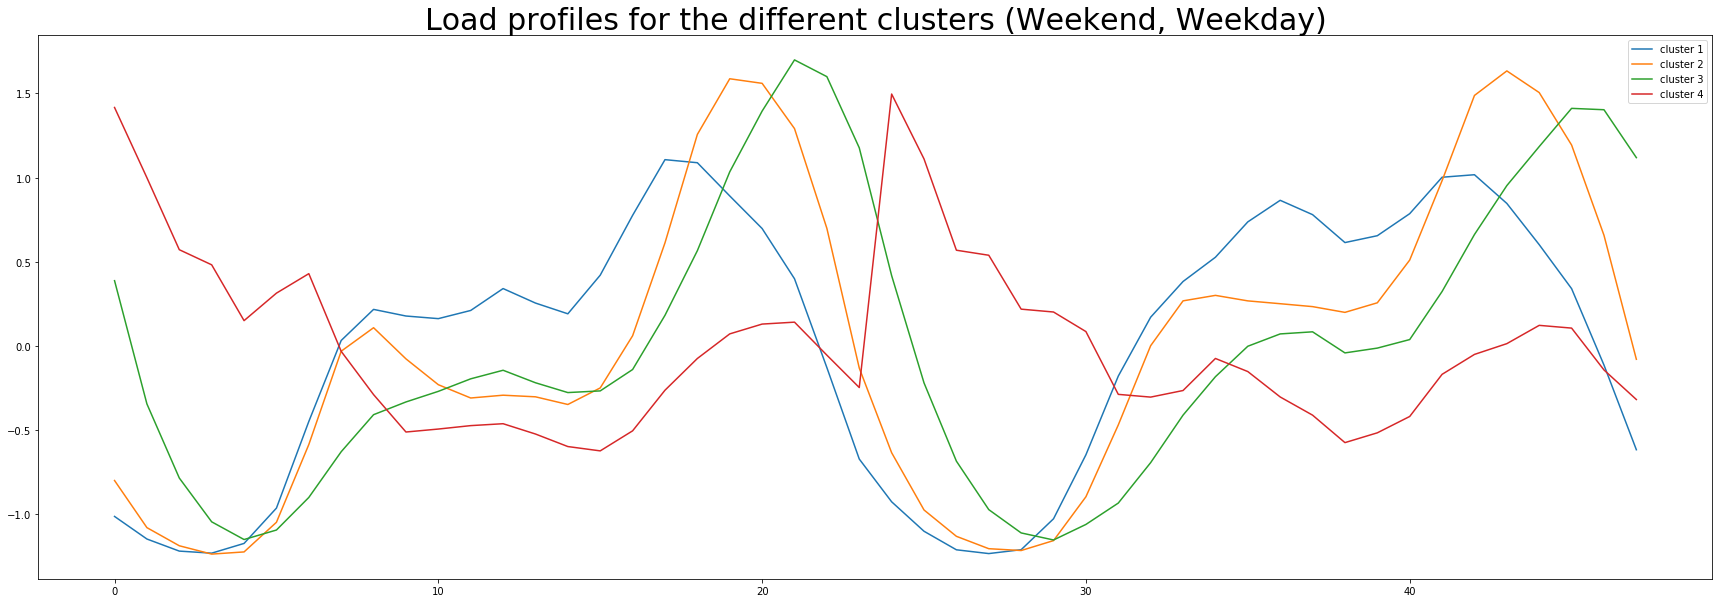

In [232]:
figure(figsize=(30,10))


plt.plot(centroids[0], label = "cluster 1") 
plt.plot(centroids[1], label = "cluster 2") 
plt.plot(centroids[2], label = "cluster 3")
plt.plot(centroids[3], label = "cluster 4")


plt.title("Load profiles for the different clusters (Weekend, Weekday)", size = 30)

plt.legend() 
plt.savefig('loads_weekend_weekday.png')
plt.show()

### Analysis on a mean week for the year

In [11]:
london_mean_week = london.groupby(["profile_ID","day_of_the_week",
    "hour"])['consumption_kWh'].apply(lambda x: np.mean(x))
london_mean_week = london_mean_week.to_frame()
london_mean_week.reset_index(inplace = True)
london_mean_week.head()


,profile_ID,day_of_the_week,hour,consumption_kWh
0,MAC000036,0,00,0.038115
1,MAC000036,0,01,0.044558
2,MAC000036,0,02,0.031750
3,MAC000036,0,03,0.043942
4,MAC000036,0,04,0.033404


In [12]:
london_mean_week['timestamp'] = london_mean_week[
    "day_of_the_week"] + ' ' + london_mean_week["hour"]

london_mean_week = london_mean_week.pivot(index='profile_ID',
                    columns='timestamp', values='consumption_kWh')
london_mean_week.drop(['MAC000037', 'MAC000197'], inplace = True)

In [13]:
london_stand_mean_week = london_mean_week.sub(london_mean_week.mean(
    axis = 1), axis = 0).divide(london_mean_week.std(axis = 1), axis = 0)

In [14]:
total_mean = london_stand_mean_week.mean(axis = 0)

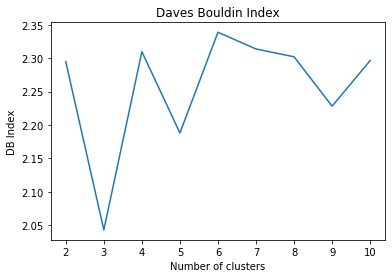

In [15]:
db = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(london_stand_mean_week)
    clusters = kmeans.labels_
    db.append(davies_bouldin_score(london_stand_mean_week, clusters))
plt.plot(range(2, 11), db)
plt.title('Daves Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('DB Index')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(london_stand_mean_week)

In [17]:
centroids = kmeans.cluster_centers_ 

In [18]:
labels = list(kmeans.labels_)


In [19]:
cluster_distrib = [labels.count(0),labels.count(1),labels.count(2)
     ,labels.count(3),labels.count(4)]
cluster_distrib

[40, 21, 96, 104, 142]

Dataframe with households and their clusters

In [20]:
ids = london_cluster.index
cluster_assigned = pd.DataFrame()
cluster_assigned["profile_ID"] = ids
cluster_assigned["Cluster"] = labels
cluster_assigned.head()

,profile_ID,Cluster
0,MAC000036,0
1,MAC000038,4
2,MAC000039,4
3,MAC000040,4
4,MAC000041,4


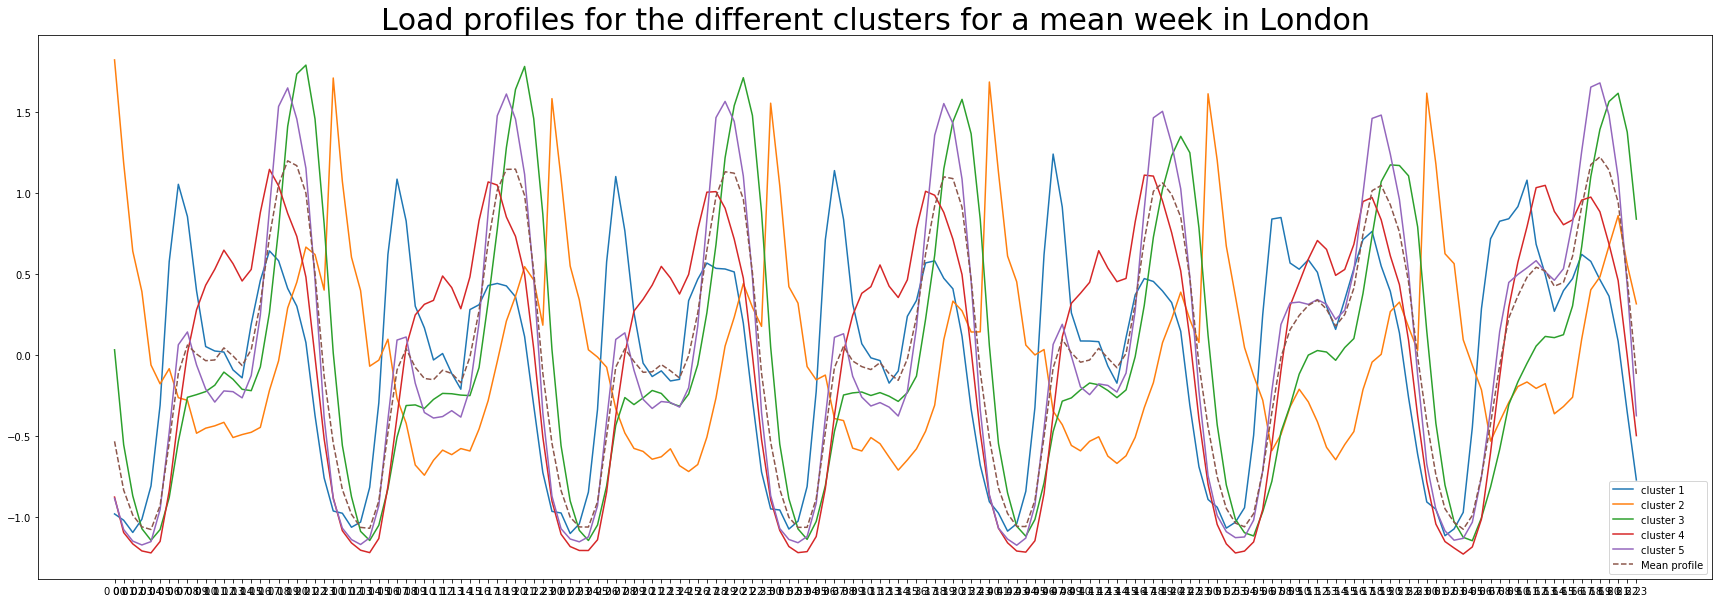

In [21]:
figure(figsize=(30,10))


plt.plot(centroids[0], label = "cluster 1") 
plt.plot(centroids[1], label = "cluster 2") 
plt.plot(centroids[2], label = "cluster 3")
plt.plot(centroids[3], label = "cluster 4")
plt.plot(centroids[4], label = "cluster 5")
plt.plot(total_mean, linestyle='dashed', label = "Mean profile")


plt.title("Load profiles for the different clusters for a mean week in London", size = 30)

plt.legend() 
plt.savefig('loads_mean_week_london.png')
plt.show()

### Matching with ACORN Profiles 

In [20]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(london_stand_mean_week)

In [21]:
labels = list(kmeans.labels_)


In [22]:
ids = london_cluster.index
len(ids)

403

In [23]:
df = pd.DataFrame()
df["Profile ID"] = ids
df.index = df["Profile ID"] 
df.drop("Profile ID", axis = 1, inplace = True )
df["Cluster"] = labels
df.head()

,Cluster
Profile ID,
MAC000036,0
MAC000038,4
MAC000039,4
MAC000040,4
MAC000041,4


In [24]:
acorn = pd.read_csv("../Data/Londondata/revised_new.csv")

In [25]:
acorn.head()

,DateTime,Acorn,Acorn_grouped,KWH/hh (per half hour),LCLid,stdorToU,year
0,2013-01-01 00:00:00,ACORN-E,Affluent,0.023,MAC000036,Std,2013
1,2013-01-01 01:00:00,ACORN-E,Affluent,0.059,MAC000036,Std,2013
2,2013-01-01 02:00:00,ACORN-E,Affluent,0.000,MAC000036,Std,2013
3,2013-01-01 03:00:00,ACORN-E,Affluent,0.068,MAC000036,Std,2013
4,2013-01-01 04:00:00,ACORN-E,Affluent,0.000,MAC000036,Std,2013


In [26]:
acorn.drop_duplicates(subset ="LCLid", 
                     inplace = True)
acorn = acorn[["LCLid", "Acorn"]]
acorn.index = acorn["LCLid"]
acorn.drop("LCLid", axis = 1, inplace = True )



In [27]:
acorn["Acorn"] = acorn["Acorn"].str.split("-").str[-1]

Assign the higher level of acorn profiling : 1 - Affluent Achievers, 2 - Rising Prosperity, 3 - Comfortable community, 4 - Financially stretched, 5 - Uban adversity  

In [28]:
acorn["Acorn"] = acorn["Acorn"].where(
    (acorn["Acorn"] != 'A'), '1').where(
    (acorn["Acorn"] != 'B'), '1').where(
    (acorn["Acorn"] != 'C'), '1').where(
    (acorn["Acorn"] != 'D'), '2').where(
    (acorn["Acorn"] != 'E'), '2').where(
    (acorn["Acorn"] != 'F'), '3').where(
    (acorn["Acorn"] != 'G'), '3').where(
    (acorn["Acorn"] != 'H'), '3').where(
    (acorn["Acorn"] != 'I'), '3').where(
    (acorn["Acorn"] != 'J'), '3').where(
    (acorn["Acorn"] != 'K'), '4').where(
    (acorn["Acorn"] != 'L'), '4').where(
    (acorn["Acorn"] != 'M'), '4').where(
    (acorn["Acorn"] != 'N'), '4').where(
    (acorn["Acorn"] != 'O'), '5').where(
    (acorn["Acorn"] != 'P'), '5').where(
    (acorn["Acorn"] != 'Q'), '5').where(
    (acorn["Acorn"] != 'U'), 'Not assigned')

In [29]:
acorn.head()

,Acorn
LCLid,
MAC000036,2
MAC000037,2
MAC000038,4
MAC000039,3
MAC000040,1


In [33]:
acorn1 = pd.merge(df, acorn, left_index=True, right_index=True)

In [40]:
cluster_0 = acorn1[acorn1["Cluster"] == 0]
cluster_1 = acorn1[acorn1["Cluster"] == 1]
cluster_2 = acorn1[acorn1["Cluster"] == 2]
cluster_3 = acorn1[acorn1["Cluster"] == 3]
cluster_4 = acorn1[acorn1["Cluster"] == 4]


In [35]:
cluster_0.Acorn.unique()

array(['2', '5', '3', '4'], dtype=object)

In [36]:
cluster_0.groupby('Acorn').count()

,Cluster
Acorn,
2,17
3,10
4,6
5,7


In [37]:
cluster_1.groupby('Acorn').count()

,Cluster
Acorn,
1,1
2,13
3,3
5,4


In [38]:
cluster_2.groupby('Acorn').count()

,Cluster
Acorn,
1,4
2,38
3,24
4,8
5,21
Not assigned,1


In [41]:
cluster_3.groupby('Acorn').count()

,Cluster
Acorn,
1,3
2,31
3,24
4,18
5,28


In [42]:
cluster_4.groupby('Acorn').count()

,Cluster
Acorn,
1,6
2,46
3,50
4,23
5,17


## Total carbon intensity per cluster 

Get household data with their clusters 

In [22]:
lond = london.copy()

In [23]:
m = lond.merge(cluster_assigned)

For each cluster, get total consumption per hour

In [24]:
cluster_hourly_consumption = m.groupby(["Cluster","day_of_the_week","hour"])['consumption_kWh'].apply(lambda x: np.sum(x
                                                                                                        )).to_frame()

In [25]:
cluster_hourly_consumption.head()

consumption_kWh
Cluster day_of_the_week hour                 
0       0               00          33.813385
                        01          37.310308
                        02          29.514769
                        03          31.131462
                        04          39.650769

In [26]:
cluster_hourly_consumption.reset_index(inplace = True)
cluster_hourly_consumption["time"] = cluster_hourly_consumption["day_of_the_week"] + cluster_hourly_consumption["hour"]


In [27]:
cluster_hourly_consumption.drop(["day_of_the_week","hour"], axis = 1, inplace = True)
cluster_hourly_consumption.head()

,Cluster,consumption_kWh,time
0,0,33.813385,000
1,0,37.310308,001
2,0,29.514769,002
3,0,31.131462,003
4,0,39.650769,004


Add the carbon intensity data

In [28]:
carbon = pd.read_csv("../Data/London_intensity/Mean_intensities.csv")
carbon.head()
carbon_inten = list(carbon["Actual Carbon Intensity (gCO2/kWh)"])*5
len(carbon_inten)

840

In [29]:
cluster_hourly_consumption["CO2_intensity"] = carbon_inten

In [30]:
cluster_hourly_consumption.tail()

,Cluster,consumption_kWh,time,CO2_intensity
835,4,402.529833,619,261.442308
836,4,383.303192,620,255.855769
837,4,344.994385,621,244.259615
838,4,279.189365,622,226.846154
839,4,197.887051,623,210.009615


In [31]:
cluster_hourly_consumption.to_csv("../Data/Hourly consumtpion per cluster Lodndon.csv")

Multiply consumption by carbon intensity to get emissions

In [32]:
cluster_hourly_consumption["Emissions"] = cluster_hourly_consumption["consumption_kWh"]*cluster_hourly_consumption[
    "CO2_intensity"]

In [33]:
cluster_emissions = cluster_hourly_consumption.groupby('Cluster')["Emissions"].apply(lambda x: np.sum(x
                                                                        )).to_frame()

<BarContainer object of 5 artists>

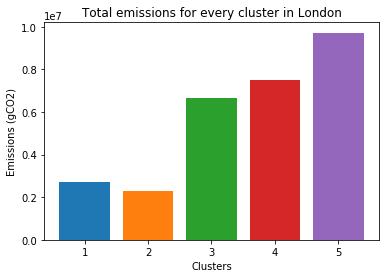

In [34]:
plt.title("Total emissions for every cluster in London")
plt.xlabel("Clusters")
plt.ylabel('Emissions (gCO2)')
plt.bar(cluster_emissions.index+1, cluster_emissions['Emissions'], color =["C0", "C1", "C2", "C3", "C4"])

In [35]:
total_emissions = cluster_emissions['Emissions'].sum()
total_emissions

28896987.153600696

This is the toal amount of CO2 produced with the current consumption patterns

## Carbon intensity per kWh per household in each cluster

In [36]:
intensity = london.copy()

carbon = pd.read_csv("../Data/London_intensity/Mean_intensities.csv")
carbon.head()
carbon_inten = list(carbon["Actual Carbon Intensity (gCO2/kWh)"])*405*4
len(carbon_inten)

intensity["Carbon Int"] = carbon_inten
intensity["Emissions"] = intensity["Carbon Int"]*intensity["consumption_kWh"]

intensity.head()

,profile_ID,season,day_of_the_week,hour,consumption_kWh,timestamp,Carbon Int,Emissions
0,MAC000036,Winter,4,00,0.027833,Winter 4 00h,206.339623,5.743119
1,MAC000036,Winter,4,01,0.032500,Winter 4 01h,214.980769,6.986875
2,MAC000036,Winter,4,02,0.030583,Winter 4 02h,214.673077,6.565418
3,MAC000036,Winter,4,03,0.023250,Winter 4 03h,215.509615,5.010599
4,MAC000036,Winter,4,04,0.033000,Winter 4 04h,216.461538,7.143231


In [37]:
co2 = intensity.groupby("profile_ID")["Emissions"].apply(lambda x: np.sum(x)).to_frame()
kwh = intensity.groupby("profile_ID")["consumption_kWh"].apply(lambda x: np.sum(x)).to_frame()
kwh.reset_index(inplace = True)
co2.reset_index(inplace = True)

a = kwh.merge(co2)

a["Intensity"] = a['Emissions']/a["consumption_kWh"]


In [38]:
a.head()
m1 = a.merge(cluster_assigned)

In [39]:
o = m1.groupby('Cluster')["Intensity"].apply(lambda x: np.mean(x)).to_frame()

In [40]:
o.head()

,Intensity
Cluster,
0,248.992678
1,239.271850
2,246.946869
3,250.497207
4,250.553048


[0.5, 5.5, 180, 270]

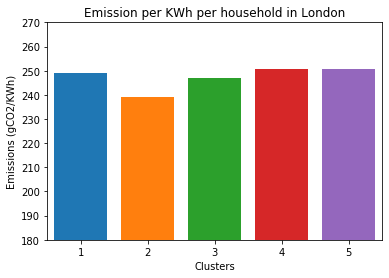

In [47]:
plt.title("Emission per KWh per household in London")
plt.xlabel("Clusters")
plt.ylabel('Emissions (gCO2/KWh)')
plt.bar(o.index+1, o['Intensity'], color =["C0", "C1", "C2", "C3", "C4"])
plt.savefig("Emissions per KWh per household London.png")
plt.axis([0.5, 5.5, 180, 270])

Cluster 2 seems to be the target 